# BAGGING

In [1]:
#Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd

In [3]:
#Read The Data

In [4]:
df=pd.read_csv("D:\Wine.csv")

In [5]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [6]:
df['Customer_Segment'].value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

In [7]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Customer_Segment', ylabel='count'>

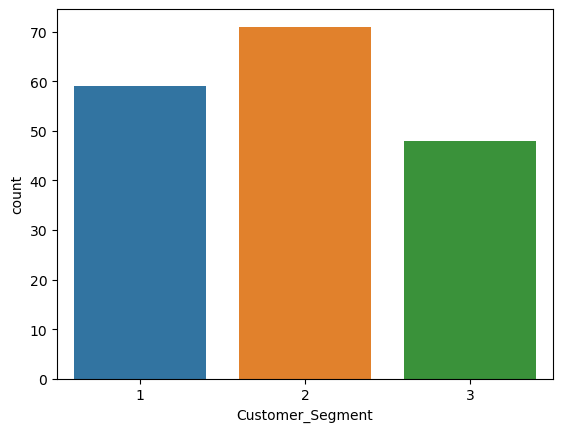

In [8]:
sns.countplot(data=df,x='Customer_Segment')

In [9]:
#Steps for Model Build

#1)Decide the x and y
#2)Split the data into training and testing set
#3)Train the model or fit the model
#4)Prediction 
#5)Evaluating the Machine learning model

In [10]:
#Data Description

In [11]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


<AxesSubplot:xlabel='Malic_Acid', ylabel='Count'>

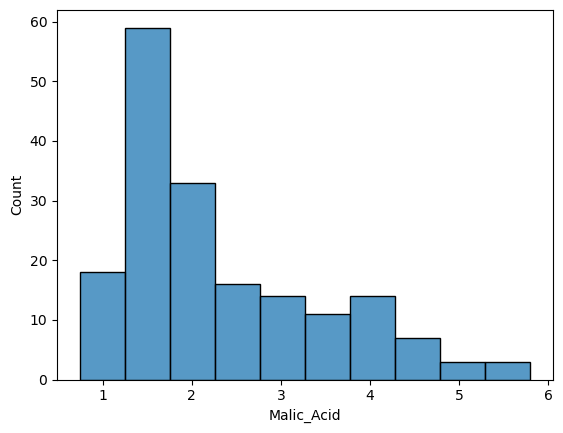

In [12]:
sns.histplot(df['Malic_Acid'])

In [13]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [14]:
#Decide X and Y

In [15]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [16]:
x

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [17]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Customer_Segment, Length: 178, dtype: int64

In [18]:
#Split the data into training and testing

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [21]:
#Train Models or fit the  models

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [23]:
models = []

models.append(('lg', LogisticRegression()))
models.append(('dt', DecisionTreeClassifier()))
models.append(('dt1', DecisionTreeClassifier(criterion='entropy')))

In [24]:
models

[('lg', LogisticRegression()),
 ('dt', DecisionTreeClassifier()),
 ('dt1', DecisionTreeClassifier(criterion='entropy'))]

In [25]:
from sklearn.ensemble import VotingClassifier ,BaggingClassifier,StackingClassifier

In [26]:
#Logistic Regression

In [27]:
lg=LogisticRegression()

In [28]:
m1 = lg.fit(x_train,y_train)

In [29]:
ypred = m1.predict(x_test)

In [30]:
lg.score(x_train,y_train)

0.9699248120300752

In [31]:
lg.score(x_test,y_test)

0.9555555555555556

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

In [33]:
confusion_matrix(y_test,ypred)

array([[17,  1,  0],
       [ 0, 17,  0],
       [ 0,  1,  9]], dtype=int64)

In [34]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        18
           2       0.89      1.00      0.94        17
           3       1.00      0.90      0.95        10

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [35]:
#create a fuction to train various models

In [65]:
def predict(model):
    model= model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    trainac=model.score(x_train,y_train)
    testac=model.score(x_test,y_test)
    
    print('Training accuracy is: ',trainac)
    print('Testing accuracy is: ',testac)
    
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))

In [66]:
predict(LogisticRegression())

Training accuracy is:  0.9699248120300752
Testing accuracy is:  0.9555555555555556
              precision    recall  f1-score   support

           1       1.00      0.94      0.97        18
           2       0.89      1.00      0.94        17
           3       1.00      0.90      0.95        10

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

[[17  1  0]
 [ 0 17  0]
 [ 0  1  9]]


In [67]:
predict(DecisionTreeClassifier())

Training accuracy is:  1.0
Testing accuracy is:  0.9555555555555556
              precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       0.94      0.94      0.94        17
           3       1.00      0.90      0.95        10

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

[[18  0  0]
 [ 1 16  0]
 [ 0  1  9]]


In [68]:
predict(DecisionTreeClassifier(criterion='entropy'))

Training accuracy is:  1.0
Testing accuracy is:  0.9333333333333333
              precision    recall  f1-score   support

           1       0.94      0.94      0.94        18
           2       0.89      0.94      0.91        17
           3       1.00      0.90      0.95        10

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.94        45
weighted avg       0.94      0.93      0.93        45

[[17  1  0]
 [ 1 16  0]
 [ 0  1  9]]


# Voting Classifier

In [69]:
from sklearn.ensemble import VotingClassifier

In [70]:
models

[('lg', LogisticRegression()),
 ('dt', DecisionTreeClassifier()),
 ('dt1', DecisionTreeClassifier(criterion='entropy'))]

In [71]:
vc = VotingClassifier(estimators=models)

In [72]:
vc.fit(x_train,y_train)

y_hat = vc.predict(x_test)

print(vc.score(x_train,y_train))
print(vc.score(x_test,y_test))

1.0
1.0


In [73]:
predict(VotingClassifier(estimators=models))

Training accuracy is:  1.0
Testing accuracy is:  0.9777777777777777
              precision    recall  f1-score   support

           1       1.00      0.94      0.97        18
           2       0.94      1.00      0.97        17
           3       1.00      1.00      1.00        10

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[17  1  0]
 [ 0 17  0]
 [ 0  0 10]]


# Bagging Classifier

In [74]:
bg = BaggingClassifier(LogisticRegression(),n_estimators=10)

In [75]:
bg.fit(x_train,y_train)

yhat = bg.predict(x_test)

print(bg.score(x_train,y_train))
print(bg.score(x_test,y_test))

0.9849624060150376
0.9555555555555556


In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
predict(RandomForestClassifier())

Training accuracy is:  1.0
Testing accuracy is:  0.9777777777777777
              precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       1.00      0.94      0.97        17
           3       1.00      1.00      1.00        10

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[18  0  0]
 [ 1 16  0]
 [ 0  0 10]]


# Boosting Classifier

In [78]:
from  sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier

In [79]:
boost = pd.read_csv('D:\Movie.csv')
boost

,userId,movie,rating
0,3,Toy Story (1995),4.0
1,6,Toy Story (1995),5.0
2,8,Toy Story (1995),4.0
3,10,Toy Story (1995),4.0
4,11,Toy Story (1995),4.5
...,...,...,...
8987,7087,GoldenEye (1995),3.0
8988,7088,GoldenEye (1995),1.0
8989,7105,GoldenEye (1995),2.0
8990,7113,GoldenEye (1995),3.0


In [80]:
predict(AdaBoostClassifier())

Training accuracy is:  1.0
Testing accuracy is:  0.9555555555555556
              precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       1.00      0.88      0.94        17
           3       0.91      1.00      0.95        10

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.95        45

[[18  0  0]
 [ 1 15  1]
 [ 0  0 10]]


In [81]:
predict(GradientBoostingClassifier())

Training accuracy is:  1.0
Testing accuracy is:  0.9555555555555556
              precision    recall  f1-score   support

           1       0.90      1.00      0.95        18
           2       1.00      0.88      0.94        17
           3       1.00      1.00      1.00        10

    accuracy                           0.96        45
   macro avg       0.97      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

[[18  0  0]
 [ 2 15  0]
 [ 0  0 10]]


# XGBM

In [82]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [83]:
from xgboost import XGBClassifier

# Stacking

In [57]:
from sklearn.ensemble import StackingClassifier

In [61]:
st = StackingClassifier(estimators=models,final_estimator=DecisionTreeClassifier(criterion='entropy'))

In [87]:
st.fit(x_train , y_train)

yhat = st.predict(x_test)

print(st.score(x_train,y_train))
print(st.score(x_test,y_test))


0.9924812030075187
0.9555555555555556
